# Linear Regression


1/1 [==============================] - 0s 125ms/step - loss: 548392828928.0000 - mae: 443237.9688 - mape: 173.7426 - mse: 548392828928.0000 - msle: 0.9333 - logcosh: 443237.3125 - cosine_proximity: 1.0000 - accuracy: 0.0000e+00
Mean Squared Error on Test Data: [548392828928.0, 443237.96875, 173.74264526367188, 548392828928.0, 0.9333085417747498, 443237.3125, 1.0, 0.0]
1/1 [==============================] - 0s 22ms/step


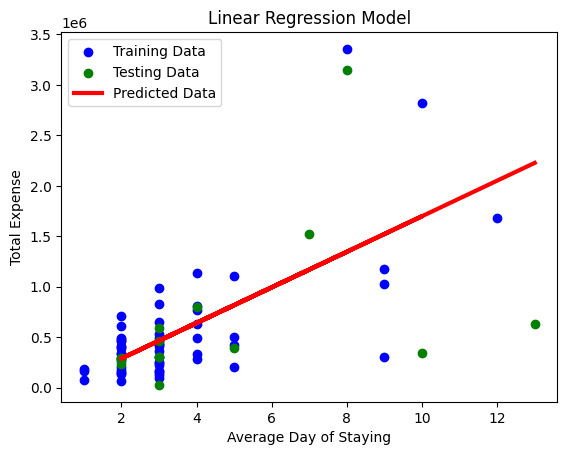

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 데이터 파일 불러오기
data = pd.read_csv('../나라별 데이터 최종본123.csv')

# 데이터에서 #N/A를 NaN으로 대체
data = data.replace('#N/A', np.nan)

# 결측치가 있는 행 제거
data = data.dropna()

# 데이터를 입력 (X)와 출력 (y)로 분할
X = data[['average-day-of-staying']].values
y = data['total-expense'].values

# 훈련 및 테스트 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Min-Max 정규화를 위한 객체 생성
scaler = MinMaxScaler()


# 훈련 데이터를 기반으로 평균과 표준편차 계산
scaler.fit(X_train)

# 훈련 데이터 표준화
X_train_std = scaler.transform(X_train)

# 테스트 데이터 표준화
X_test_std = scaler.transform(X_test)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, input_dim=1, activation='relu'),  # 64개의 뉴런과 ReLU 활성화 함수
    tf.keras.layers.Dense(units=128, activation='relu'),  # 더 많은 레이어 추가
    tf.keras.layers.Dense(units=1)  # 최종 출력 레이어
])


# TensorFlow 선형 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=1)
])

# 모델 컴파일
model.compile(optimizer='SGD', loss='mean_squared_error', metrics=['mae', 'mape', 'mse', 'msle', 'logcosh', 'cosine_proximity', 'accuracy'])



# 모델 학습
model.fit(X_train, y_train, epochs=300, verbose=0)


# 모델 성능 평가
loss = model.evaluate(X_test, y_test)
# print(f'Mean Squared Error on Test Data: {loss}')

# 예측값 생성
y_pred = model.predict(X_test)

# 훈련 데이터 포인트 시각화
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# 테스트 데이터 포인트 시각화
plt.scatter(X_test, y_test, color='green', label='Testing Data')

# 모델에 의한 예측 시각화
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Predicted Data')

plt.title('Linear Regression Model')
plt.xlabel('Average Day of Staying')
plt.ylabel('Total Expense')
plt.legend()
plt.show()


# KNN-Classifier


   country  total-expense  average-day-of-staying
12    라트비아       296286.0                     2.0
79      태국       293664.0                     2.0
6     노르웨이       283176.0                     2.0


c:\Users\c\Desktop\JJ\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


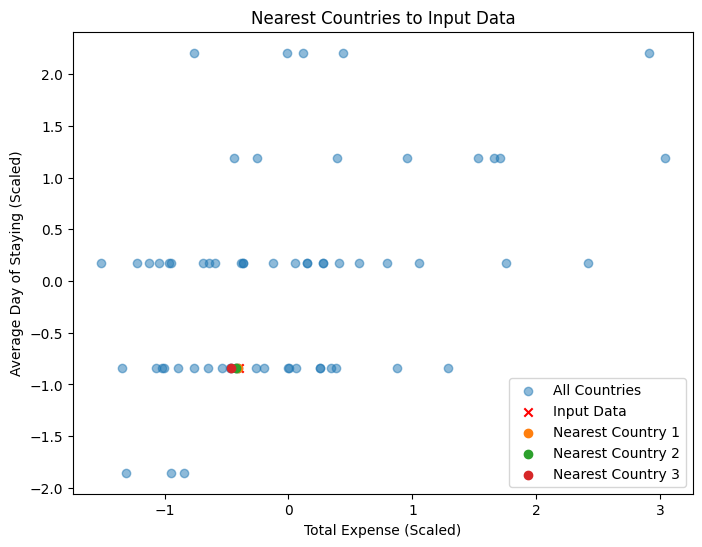

In [4]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import json

# 데이터 파일 불러오기
data = pd.read_csv('../나라별 데이터 최종본123.csv')

# 데이터에서 #N/A를 NaN으로 대체
data = data.replace('#N/A', np.nan)

# 결측치가 있는 행 제거
data = data.dropna()

# IQR 방법을 사용하여 이상치 제거
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

data = remove_outliers_iqr(data, 'total-expense')
data = remove_outliers_iqr(data, 'average-day-of-staying')

# 입력 데이터 (total_expense, average_day_of_staying)
total_expense_input = 300000  # 예시로 입력한 값
average_day_of_staying_input = 2  # 예시로 입력한 값
input_data = np.array([total_expense_input, average_day_of_staying_input]).reshape(1, -1)

# 스케일링을 위한 객체 생성
scaler = StandardScaler()

# 데이터 스케일링
data_scaled = scaler.fit_transform(data[['total-expense', 'average-day-of-staying']])

# KNN 모델 생성
knn = NearestNeighbors(n_neighbors=3)  # K=3로 설정

# 모델 피팅
knn.fit(data_scaled)

# 입력값 스케일링
input_data_scaled = scaler.transform(input_data)

# 입력값과 가장 가까운 국가 3개 검색
distances, indices = knn.kneighbors(input_data_scaled)
nearest_countries = data.iloc[indices[0]]

print(nearest_countries[['country', 'total-expense', 'average-day-of-staying']])


# 그래프 생성
plt.figure(figsize=(8, 6))

# 모든 국가 데이터 점으로 표시
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], label='All Countries', alpha=0.5)

# 입력값 표시
plt.scatter(input_data_scaled[:, 0], input_data_scaled[:, 1], color='red', label='Input Data', marker='x')

# 가장 가까운 국가 3개 표시
for i in range(3):
    plt.scatter(data_scaled[indices[0][i], 0], data_scaled[indices[0][i], 1], label=f'Nearest Country {i+1}', marker='o')

# 그래프 레이블과 범례 추가
plt.xlabel('Total Expense (Scaled)')
plt.ylabel('Average Day of Staying (Scaled)')
plt.title('Nearest Countries to Input Data')
plt.legend()

# 그래프 표시
plt.show()


